## Prophet


In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import pandas as pd

# fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import add_changepoints_to_plot

# Custom
from process import load_data, split_data

In [76]:
sys.executable

'C:\\Users\\rick.arko\\Anaconda3\\envs\\dengue\\python.exe'

## Split Train/Test

In [196]:
holdout = .8

dfin = load_data()
dfin['ds'] = dfin['week_start_date']
dfin['y'] = dfin['total_cases']


df_sj = dfin[dfin['city'] == 'sj']
df_sj = df_sj.fillna(method='ffill')
X_trsj, X_valsj, y_trsj, y_valsj = split_data(df_sj, percent_holdout=holdout)

df_iq = dfin[dfin['city'] == 'iq']
df_iq = df_iq.fillna(method='ffill')
X_triq, X_valiq, y_triq, y_valiq = split_data(df_iq, percent_holdout=holdout)

## Basic Prophet SJ

In [197]:
model_sj = Prophet(
#     **{'weekly_seasonality': True}
#     n_changepoints=6
)
model_sj = model_sj.fit(X_trsj[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


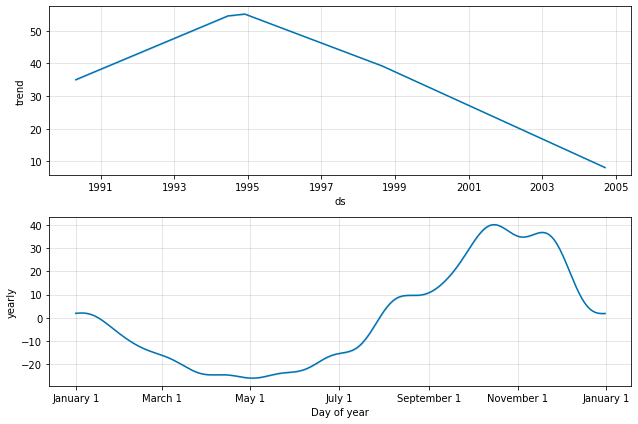

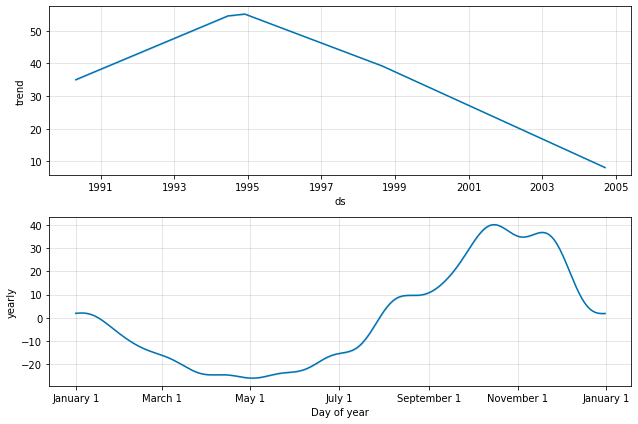

In [198]:
future_sj = model_sj.make_future_dataframe(len(y_valsj))
preds_sj = model_sj.predict()
model_sj.plot_components(preds_sj)

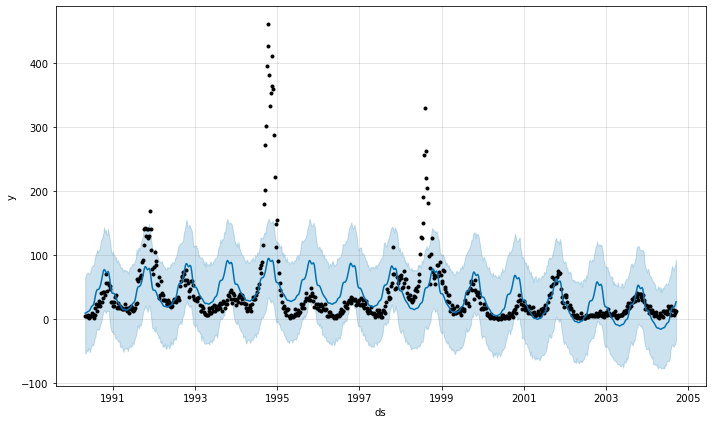

In [199]:
f_sj = model_sj.plot(preds_sj)

## Basic Prophet IQ

In [200]:
model_iq = Prophet(
#     **{'weekly_seasonality': True}
)
model_iq = model_iq.fit(X_triq[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


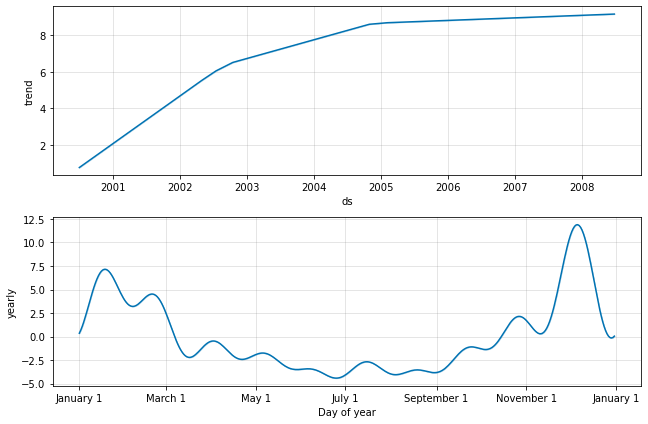

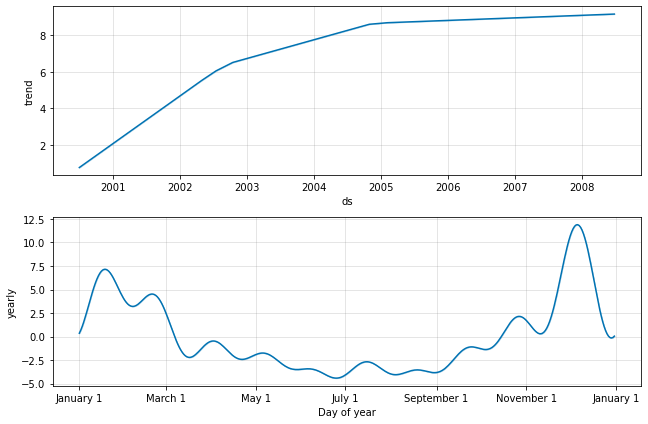

In [201]:
future_iq = model_iq.make_future_dataframe(len(X_valiq))
preds_iq = model_iq.predict()
model_iq.plot_components(preds_iq)